# Feature Selection

Feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of reducing the number of input variables when developing a predictive model. 

-Feature selection techniques are used for several reasons:

- It reduces model complexity by dropping some irrelevant features.
- Helps ML algorithm to train a model faster.
- Redcution of dimensionality helps in avoid overfitting.

-Following are the feature selection techniques:

- Univariate Selection,
- Feature Importance,
- Correlation Matrix with Heatmap

# Univariate Selection

- Statistical tests can be used to select those features that have the strongest relationship with the output variable.

- The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

- The example below uses the chi-squared (chi²) statistical test for non-negative features to select k (k=10) of the best features from the Mobile Price Range Prediction Dataset.



In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
mobile_data = pd.read_csv("train.csv")

In [4]:
X = mobile_data.iloc[:,0:20]  #independent variables
y = mobile_data.iloc[:,-1]    #target variable i.e price range

In [5]:
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
#apply SelectKBest class to extract top 10 best features

BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,y)

In [7]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [11]:
#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)   

# feature scores
f_Scores.columns = ['Specs','Score'] 

In [12]:
print(f_Scores)                
# Score value is directly proportional to the feature importance

            Specs          Score
0   battery_power   14129.866576
1            blue       0.723232
2     clock_speed       0.648366
3        dual_sim       0.631011
4              fc      10.135166
5          four_g       1.521572
6      int_memory      89.839124
7           m_dep       0.745820
8       mobile_wt      95.972863
9         n_cores       9.097556
10             pc       9.186054
11      px_height   17363.569536
12       px_width    9810.586750
13            ram  931267.519053
14           sc_h       9.614878
15           sc_w      16.480319
16      talk_time      13.236400
17        three_g       0.327643
18   touch_screen       1.928429
19           wifi       0.422091


In [13]:
#print 10 best features in descending order
print(f_Scores.nlargest(10,'Score'))      

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


# Feature Importance

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, but here in this example I will be using XGB Classifier for extracting the top 10 features for the dataset.

In [15]:
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv("train.csv")
X1 = data.iloc[:,0:20]  #independent columns
y1 = data.iloc[:,-1]    #target column i.e price range

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X1,y1)

ExtraTreesClassifier()

In [20]:
print(model.feature_importances_)

[0.05988455 0.0202262  0.03322512 0.02007517 0.0337695  0.01802436
 0.03627975 0.03482677 0.037898   0.03349788 0.03426005 0.04741382
 0.04857032 0.38183129 0.03435901 0.03467846 0.03535347 0.01485596
 0.01975666 0.02121365]


In [21]:
#use inbuilt class feature_importances of tree based#classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_,index=X.columns)

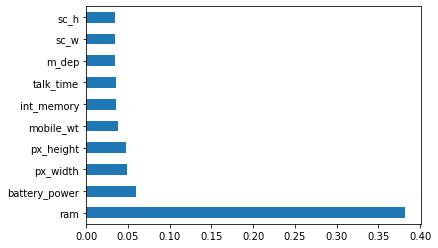

In [22]:
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable). Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
data1 = pd.read_csv("train.csv")

In [25]:
X2 = data.iloc[:,0:20]  #independent columns
y2 = data.iloc[:,-1]    #target column i.e price range

In [29]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

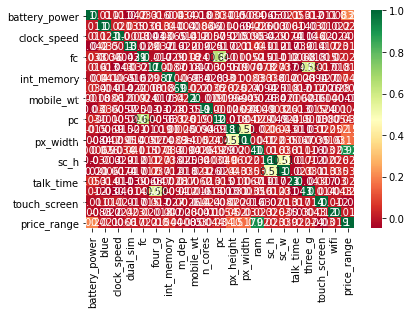

In [30]:
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")